# Ronan McKenna

## Research question/interestsFor this project we want to research which factors of a Kickstarter project can best determine its chances of success.
* What categories are most likely to succeed?
* Does project duration have an effect on success?
* How does goal amount affect project success?
* Does the project's country impact success?.

In [1]:
import pandas as pd
pd.set_option('use_inf_as_na', True)
pd.__version__

'1.3.2'

In [2]:
df = pd.read_csv('../data/raw/ks-projects-201801.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


# Milestone 3
## Task 1 (EDA)

In [3]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

print(df.shape)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

(378661, 15)
There are 378661 rows and 15 columns


In [4]:
print('Columns and their data types consist of:')
for i,v in enumerate(df.columns):
    print(str(i) + ': ' + v + ' (' + df.dtypes[i].name + ')')

Columns and their data types consist of:
0: ID (int64)
1: name (object)
2: category (object)
3: main_category (object)
4: currency (object)
5: deadline (object)
6: goal (float64)
7: launched (object)
8: pledged (float64)
9: state (object)
10: backers (int64)
11: country (object)
12: usd pledged (float64)
13: usd_pledged_real (float64)
14: usd_goal_real (float64)


In [5]:
# Show useful stats regarding numerical columns format out of scientific notation for clearer reading
df.describe().apply(lambda row: row.apply(lambda val: '%f' % val)).T

,count,mean,std,min,25%,50%,75%,max
ID,378661.000000,1074731191.988755,619086204.322633,5971.000000,538263516.000000,1075275634.000000,1610148624.000000,2147476221.000000
goal,378661.000000,49080.791521,1183391.259092,0.010000,2000.000000,5200.000000,16000.000000,100000000.000000
pledged,378661.000000,9682.979339,95636.010005,0.000000,30.000000,620.000000,4076.000000,20338986.270000
backers,378661.000000,105.617476,907.185035,0.000000,2.000000,12.000000,56.000000,219382.000000
usd pledged,374864.000000,7036.728867,78639.745308,0.000000,16.980000,394.720000,3034.090000,20338986.270000
usd_pledged_real,378661.000000,9058.924074,90973.343107,0.000000,31.000000,624.330000,4050.000000,20338986.270000
usd_goal_real,378661.000000,45454.401465,1152950.055089,0.010000,2000.000000,5500.000000,15500.000000,166361390.710000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
name,378657,375764,New EP/Music Development,41
category,378661,159,Product Design,22314
main_category,378661,15,Film & Video,63585
currency,378661,14,USD,295365
deadline,378661,3164,2014-08-08,705
launched,378661,378089,1970-01-01 01:00:00,7
state,378661,6,failed,197719
country,378661,23,US,292627


## Task 2 (Analysis Pipeline)
### Load Data
##### Loads data and converts all values in the deadline and launched columns from a string to a datetime datatype without the time component

In [8]:
df2 = pd.read_csv('../data/raw/ks-projects-201801.csv')
df2 = df2.assign(Launched = pd.to_datetime(df2.launched).dt.normalize())
df2 = df2.assign(Deadline = pd.to_datetime(df2.deadline).dt.normalize())
df2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Launched,Deadline
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11,2015-10-09
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02,2017-11-01
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12,2013-02-26
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17,2012-04-16
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-07-04,2015-08-29


### Clean Data
##### Removes the columns (ID, name, category, goal, pledged, usd pledged) and then removes any rows that didn't result in an explicit project success or failure (and resets indexes)

In [9]:
df2 = df2.drop(['ID', 'name', 'category', 'goal', 'pledged', 'usd pledged', 'launched', 'deadline'], axis=1)
df2 = df2.drop(df2[(df2.state != 'successful') & (df2.state != 'failed')].index)
df2 = df2.reset_index(drop=True)
df2.head()

,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,Launched,Deadline
0,Publishing,GBP,failed,0,GB,0.0,1533.95,2015-08-11,2015-10-09
1,Film & Video,USD,failed,15,US,2421.0,30000.00,2017-09-02,2017-11-01
2,Film & Video,USD,failed,3,US,220.0,45000.00,2013-01-12,2013-02-26
3,Music,USD,failed,1,US,1.0,5000.00,2012-03-17,2012-04-16
4,Food,USD,successful,224,US,52375.0,50000.00,2016-02-26,2016-04-01


### Processing Data
##### Inserts a new column that calculates the average amount pledged per person in a project by dividing (usd_pledged_real / backers) and also inserts a Duration column by subtracting (deadline - launched)

In [10]:
df2 = df2.assign(AvgPledged = df2.usd_pledged_real / df2.backers)
df2 = df2.fillna({'AvgPledged':0})  # Fixes divide by zero outputting NaN and replaces with 0

df2 = df2.assign(Duration = (df2.Deadline - df2.Launched).dt.days)
df2.head()

,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,Launched,Deadline,AvgPledged,Duration
0,Publishing,GBP,failed,0,GB,0.0,1533.95,2015-08-11,2015-10-09,0.000000,59
1,Film & Video,USD,failed,15,US,2421.0,30000.00,2017-09-02,2017-11-01,161.400000,60
2,Film & Video,USD,failed,3,US,220.0,45000.00,2013-01-12,2013-02-26,73.333333,45
3,Music,USD,failed,1,US,1.0,5000.00,2012-03-17,2012-04-16,1.000000,30
4,Food,USD,successful,224,US,52375.0,50000.00,2016-02-26,2016-04-01,233.816964,35


### Wrangle Data
##### Rename columns for better clarity

In [11]:
df2 = df2.rename(columns={'main_category': 'Category', 'currency': 'Currency', 'state': 'Success', 'backers': 'Supporters', 'country': 'Country', 'usd_pledged_real': 'Pledged', 'usd_goal_real': 'Goal'})
df2.head()

,Category,Currency,Success,Supporters,Country,Pledged,Goal,Launched,Deadline,AvgPledged,Duration
0,Publishing,GBP,failed,0,GB,0.0,1533.95,2015-08-11,2015-10-09,0.000000,59
1,Film & Video,USD,failed,15,US,2421.0,30000.00,2017-09-02,2017-11-01,161.400000,60
2,Film & Video,USD,failed,3,US,220.0,45000.00,2013-01-12,2013-02-26,73.333333,45
3,Music,USD,failed,1,US,1.0,5000.00,2012-03-17,2012-04-16,1.000000,30
4,Food,USD,successful,224,US,52375.0,50000.00,2016-02-26,2016-04-01,233.816964,35


## Task 3 (Method Chaining)
### Method chaining and processing code now in project_functions.py

In [12]:
import project_functions1 as p1
dframe = p1.load_and_process('../data/raw/ks-projects-201801.csv')
print('\n', len(df.index) - len(dframe.index), 'rows removed for having unuseful success values (canceled, live, undefined, suspended)\n')
dframe


 46986 rows removed for having unuseful success values (canceled, live, undefined, suspended)



,Category,Currency,Success,Supporters,Country,Pledged,Goal,Launched,Deadline,AvgPledged,Duration
0,Publishing,GBP,failed,0,GB,0.0,1533.95,2015-08-11,2015-10-09,0.000000,59
1,Film & Video,USD,failed,15,US,2421.0,30000.00,2017-09-02,2017-11-01,161.400000,60
2,Film & Video,USD,failed,3,US,220.0,45000.00,2013-01-12,2013-02-26,73.333333,45
3,Music,USD,failed,1,US,1.0,5000.00,2012-03-17,2012-04-16,1.000000,30
4,Food,USD,successful,224,US,52375.0,50000.00,2016-02-26,2016-04-01,233.816964,35
...,...,...,...,...,...,...,...,...,...,...,...
331670,Food,USD,failed,4,US,154.0,6500.00,2017-03-20,2017-04-19,38.500000,30
331671,Film & Video,USD,failed,5,US,155.0,1500.00,2011-06-22,2011-07-19,31.000000,27
331672,Film & Video,USD,failed,1,US,20.0,15000.00,2010-07-01,2010-08-16,20.000000,46
331673,Technology,USD,failed,6,US,200.0,15000.00,2016-01-13,2016-02-13,33.333333,31


## Task 4 (Data Analysis)

In [13]:
print(dframe.shape)
print(f'There are {dframe.shape[0]} rows and {dframe.shape[1]} columns')
print('\nColumns and their data types consist of:')
for i,v in enumerate(dframe.columns):
    print(str(i) + ': ' + v + ' (' + dframe.dtypes[i].name + ')')

(331675, 11)
There are 331675 rows and 11 columns

Columns and their data types consist of:
0: Category (object)
1: Currency (object)
2: Success (object)
3: Supporters (int64)
4: Country (object)
5: Pledged (float64)
6: Goal (float64)
7: Launched (datetime64[ns])
8: Deadline (datetime64[ns])
9: AvgPledged (float64)
10: Duration (int64)


In [14]:
# Show useful stats regarding numerical columns format out of scientific notation for clearer reading
dframe.describe().apply(lambda row: row.apply(lambda val: '%f' % val)).T

,count,mean,std,min,25%,50%,75%,max
Supporters,331675.000000,116.381581,965.427268,0.000000,2.000000,15.000000,63.000000,219382.000000
Pledged,331675.000000,9943.461256,96732.934175,0.000000,50.000000,788.000000,4608.000000,20338986.270000
Goal,331675.000000,41510.001543,1108929.663087,0.010000,2000.000000,5000.000000,15000.000000,166361390.710000
AvgPledged,331675.000000,66.087346,131.610145,0.000000,16.673375,42.304593,77.533542,10000.000000
Duration,331675.000000,33.954875,12.713332,1.000000,30.000000,30.000000,36.000000,92.000000


In [15]:
dframe.describe(include='object').T

,count,unique,top,freq
Category,331675,15,Film & Video,56527
Currency,331675,14,USD,261511
Success,331675,2,failed,197719
Country,331675,23,US,261360


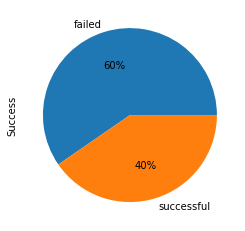

In [16]:
fig, ax = plt.subplots()
dframe['Success'].value_counts().plot(ax=ax, kind='pie', autopct='%1.0f%%');

##### Interestingly a perfect 60-40 split occurs when comparing number of failed projects to number of successful projects
####

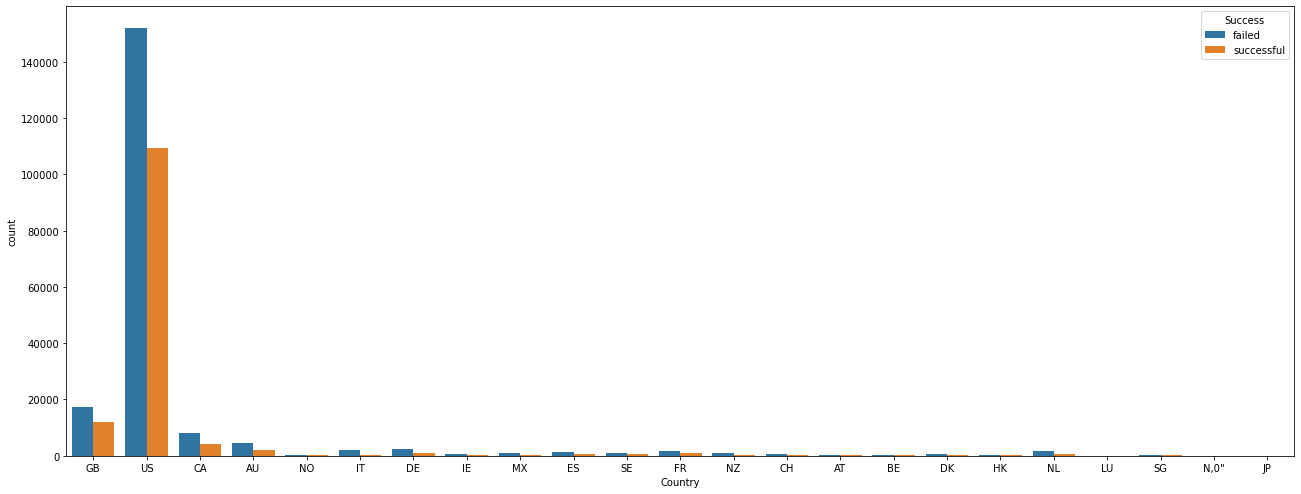

In [17]:
fig, ax = plt.subplots()
catcountplot = sns.countplot(x='Country', data=dframe, hue='Success')
fig.set_size_inches(22, 8.27)

##### America is by far the most common country for Kickstarter projects, which makes sense. Then Great Britain, Canada, and Australia are the next most common. They all have roughly the same distribtion of failed and successful projects.
####

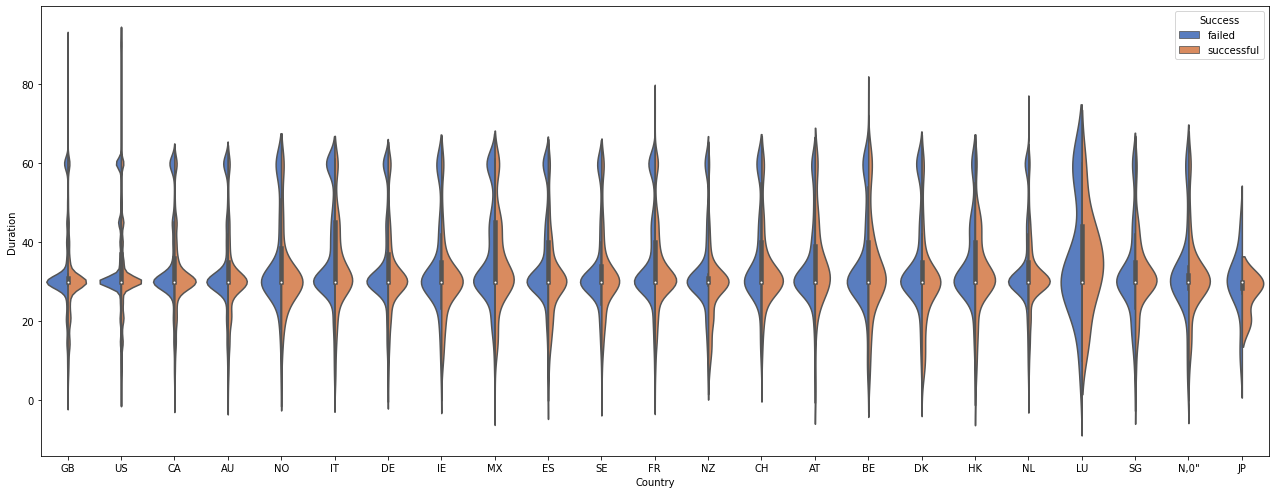

In [18]:
fig, ax = plt.subplots()
sns.violinplot(x="Country", y="Duration", data=dframe, palette="muted", split=True, hue="Success")
fig.set_size_inches(22, 8.27)

##### This violin plot shows the density of project durations for failed and successful projects in each country. The countries with a higher number of projects like Britain and Canada and America all have roughly the same distribution with some variance. However, countries with very few Kickstarter projects like Luxembourg (LU) and Japan (JP) have very unusual distributions. This isn't indicative of a difference based on country but rather a difference based on limited data.
##### The most interesting plot to me here is Mexico's (MX) because it's on par with some other countries in terms of number of projects, yet it has a different shape. Mexico's projects seem to be statistically much more successful with a longer duration (30-60 day range) compared to other countries with a similar project count.
##### With all of this said I think if all these countries had a similar number of projects they would all form similar distributions, so it's hard to draw any meaningful conclusions.
####

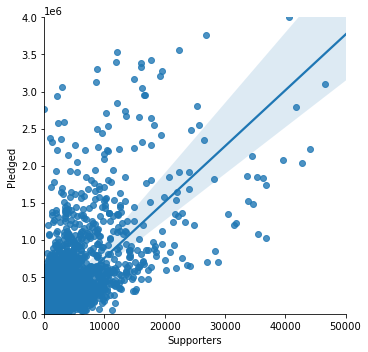

In [19]:
r = sns.lmplot(data=dframe, x='Supporters', y='Pledged')
r.set(xlim=(0,50000))
r.set(ylim=(0,4e6));

##### This plot shows the regression line correlation between number of supporters and amount pledged, from which we can confidently derive AvgPledged
####

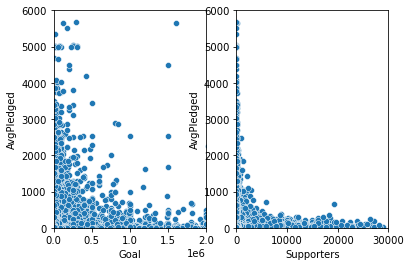

In [22]:
fig, ax =plt.subplots(1,2)
r = sns.scatterplot(data=dframe, x='Goal', y='AvgPledged', ax=ax[0])
r.set(xlim=(0,2000000))
r.set(ylim=(0,6000))
n = sns.scatterplot(data=dframe, x='Supporters', y='AvgPledged', ax=ax[1])
n.set(xlim=(0,30000))
n.set(ylim=(0,6000));

##### This plot shows that average amount pledged is generally much higher with lower goals because people are more willing to pay a large amount for a more achievable goal and thus they can singlehandedly contribute to a larger portion of the goal amount. And therefore projects with less supporters also have a higher average pledged amount.
####

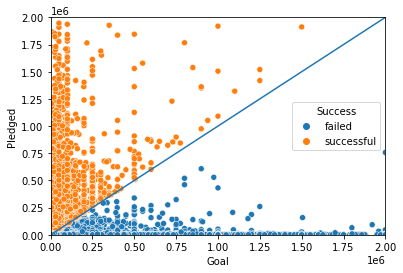

In [23]:
fig, ax = plt.subplots(1,1)
n = sns.scatterplot(data=dframe, x='Goal', y='Pledged', hue='Success')
n.set(xlim=(0,2e6))
n.set(ylim=(0,2e6))
ax.axline((1, 1), slope=1);

##### Generally, a project with a lower goal is more likely to achieve a high pledged amount. We can see that many successful projects reach a pledged amount much higher than their original goal.
##### Every point above the diagonal line represents a successful project.
####

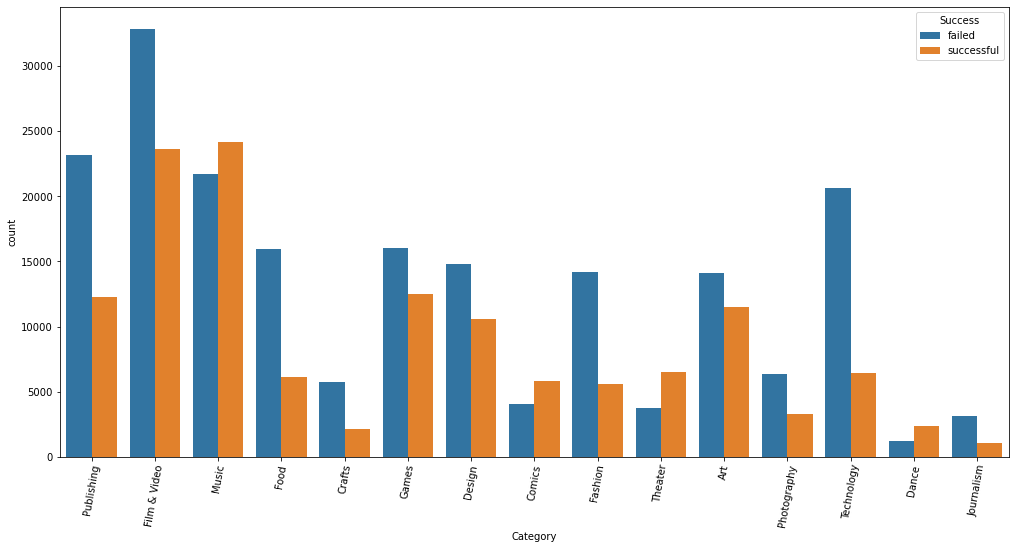

In [24]:
fig, ax = plt.subplots()
catcountplot = sns.countplot(x='Category', data=dframe, hue='Success')
catcountplot.set_xticklabels(catcountplot.get_xticklabels(), rotation=80);
fig.set_size_inches(17, 8.27)

##### This plot is very interesting to me. I was expecting each category to have roughly the same distribution between failed and successful projects, but that is not the case. Projects of the category music, comics, theater, and dance are statistically more likely to succeed than fail. Whereas every other category is more likely to fail than succeed, especially categories such as technology and food which are more than twice as likely to fail.
####

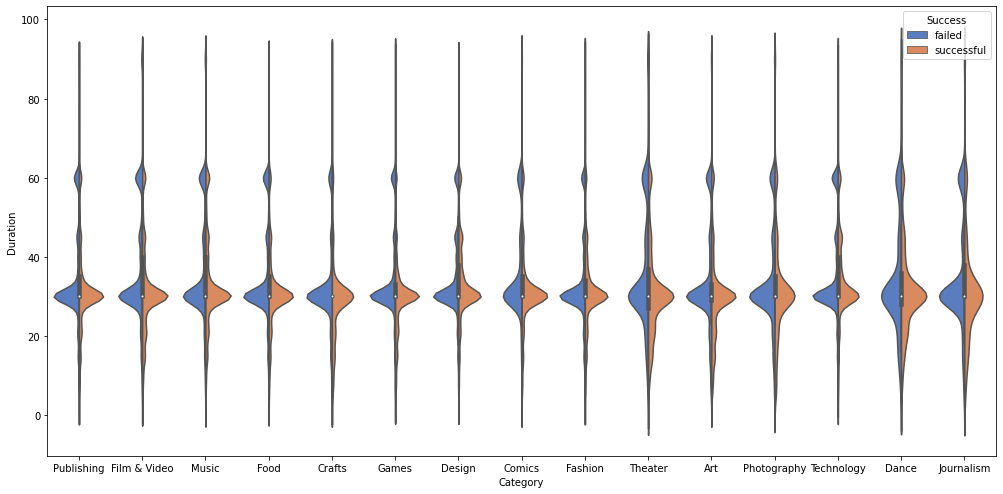

In [25]:
fig, ax = plt.subplots()
sns.violinplot(x="Category", y="Duration", data=dframe, palette="muted", split=True, hue="Success")
fig.set_size_inches(17, 8.27)

##### This plot shows the density of durations for failed and successful projects in each category. All categories have a majority of their project durations lasting 30 days (1 month). The violin plots reflect the category count plot above since the categories like Theater and Dance have a comparatively higher success density.
##### Not all of the plots are symmetrical though. Journalism for instance seems to succeed in a wider range of durations around the 30 day mark, but fails much more frequently at the 60 day mark. In fact every category project is statistically more likely to fail with a 60 day duration.
####

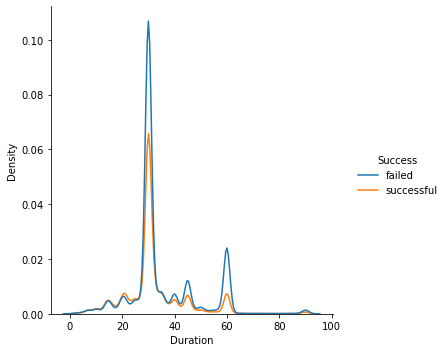

In [26]:
sns.displot(data=dframe, x='Duration', kind='kde', hue='Success');

##### The most common project durations are 30 days, 60 days, and 45 days.
##### This distribution plot shows that the duration of a project has little to no effect on its success. At most durations the project is equal or less likely to succeed than fail, which matches our 60% failure 40% success probability distribution. However, for some reason it appears that projects with a 20 day duration are statistically slightly more likely to succeed than fail.
####


 2015608.88  is the maximum successful goal amount



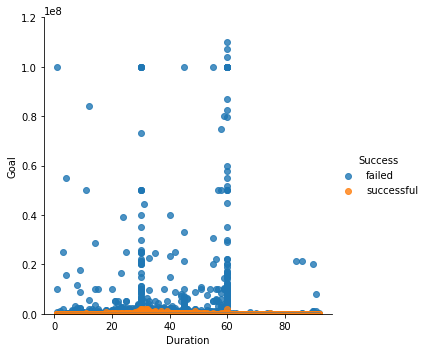

In [27]:
r = sns.lmplot(data=dframe, x='Duration', y='Goal', hue='Success')
print('\n', dframe[dframe['Success']=='successful']['Goal'].max(), " is the maximum successful goal amount\n")
r.set(ylim=(0,1.2e8));

##### When plotting duration against goal amount, we see the same distribution as the density plot but a stark difference between the goals of failed projects and successful projects. The majority of failed projects have an unrealistically high goal amount, which makes sense. All of the successful projects have a relatively low goal amount with none of them exceeding \$2,016,000, and these projects are statistically the most likely to succeed if they set 30 day or 60 day durations.

##
### Conclusions
* 40% of all completed Kickstarter projects are successful
* Projects that revolve around music, comics, theater, or dance are the only categories that are statistically more likely to succeed than fail.
* Projects with goals higher than $2,016,000 have never succeeded
* Projects with a 30 day duration (1 month runtime) are by far the most common. The next most common are 60 days and then 45 days.
* You're statistically more likely to have a successful project at the 30 day mark than the 60 day mark
* The only duration that is statistically more likely to succeed than fail is at the 20 day mark, but this is probably a coincidental byproduct of not having as many outlandish goals at the 20 day mark.
* Country has little to do with project success. Most differences visualized were a result of limited data rather than true differences. Mexico may be the only exception since its projects seem to be statistically much more successful with a longer duration (30-60 day range) compared to other countries with a similar project count. But this should still be taken lightly considering how relatively few successful projects compose this result.
* People are more willing to pledge a higher amount when the goal is lower and thus they can singlehandedly contribute to a larger portion of the goal.
* The majority of super successful Kickstarter projects set a reasonable goal and achieve a much higher amount than their goal set out for. This shows that supporters will continue to pledge money to a project even if the project has already reached its goal if they're incentivized through a project's reward system or if they're simply excited about the project and believe in it.